# PCA ON LFW(Labelled Faces in Wild) Dataset

## Imported Packages

In [77]:
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

## Applying PCA and KNN classification on the LFW dataset

Data shape: (760, 2914)

Some examples of images in dataset:-


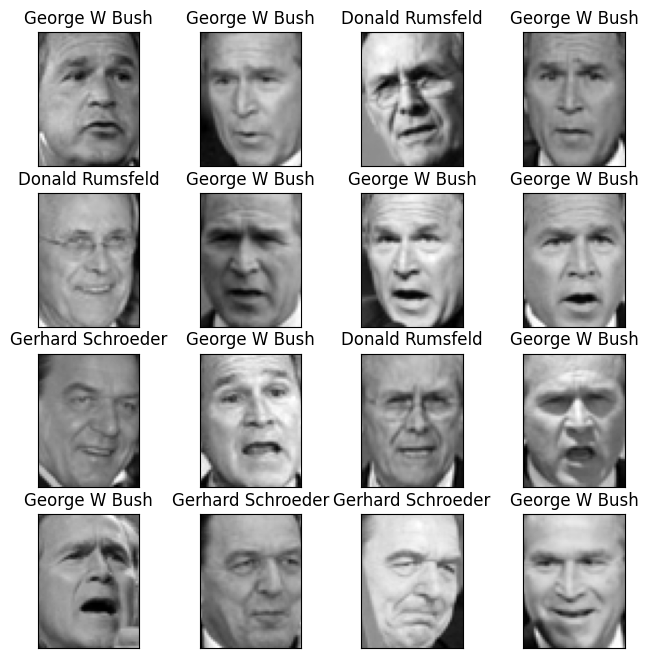

In [78]:
# Load the LFW dataset
lfw_dataset = fetch_lfw_people(min_faces_per_person=50)

# Extract the images and target labels
X = lfw_dataset.data
y = lfw_dataset.target
target_names = lfw_dataset.target_names

# Print the dimensions of the data
print("Data shape:", X.shape)

print('\nSome examples of images in dataset:-')
# Visualize a few examples
fig, axes = plt.subplots(4, 4, figsize=(8, 8), subplot_kw={'xticks': [], 'yticks': []})
for i, ax in enumerate(axes.flat):
    ax.imshow(X[i].reshape(lfw_dataset.images.shape[1], lfw_dataset.images.shape[2]), cmap='gray')
    ax.set_title(target_names[y[i]])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Apply PCA for dimensionality reduction
n_components = 100
pca = PCA(n_components=n_components, whiten=True)
pca.fit(X_train)

# Transform the training and testing sets using PCA
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


In [79]:
# Train a KNN classifier on the transformed data
k = 5
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train_pca, y_train)

# Evaluate the performance of the classifier on the test set
y_pred = knn_classifier.predict(X_test_pca)
print(classification_report(y_test, y_pred, target_names=lfw_dataset.target_names))


                   precision    recall  f1-score   support

  Donald Rumsfeld       0.92      0.43      0.59        28
    George W Bush       0.81      0.99      0.89       137
Gerhard Schroeder       0.90      0.36      0.51        25

         accuracy                           0.83       190
        macro avg       0.88      0.59      0.66       190
     weighted avg       0.84      0.83      0.80       190



## First 25 eigenfaces learned by PCA

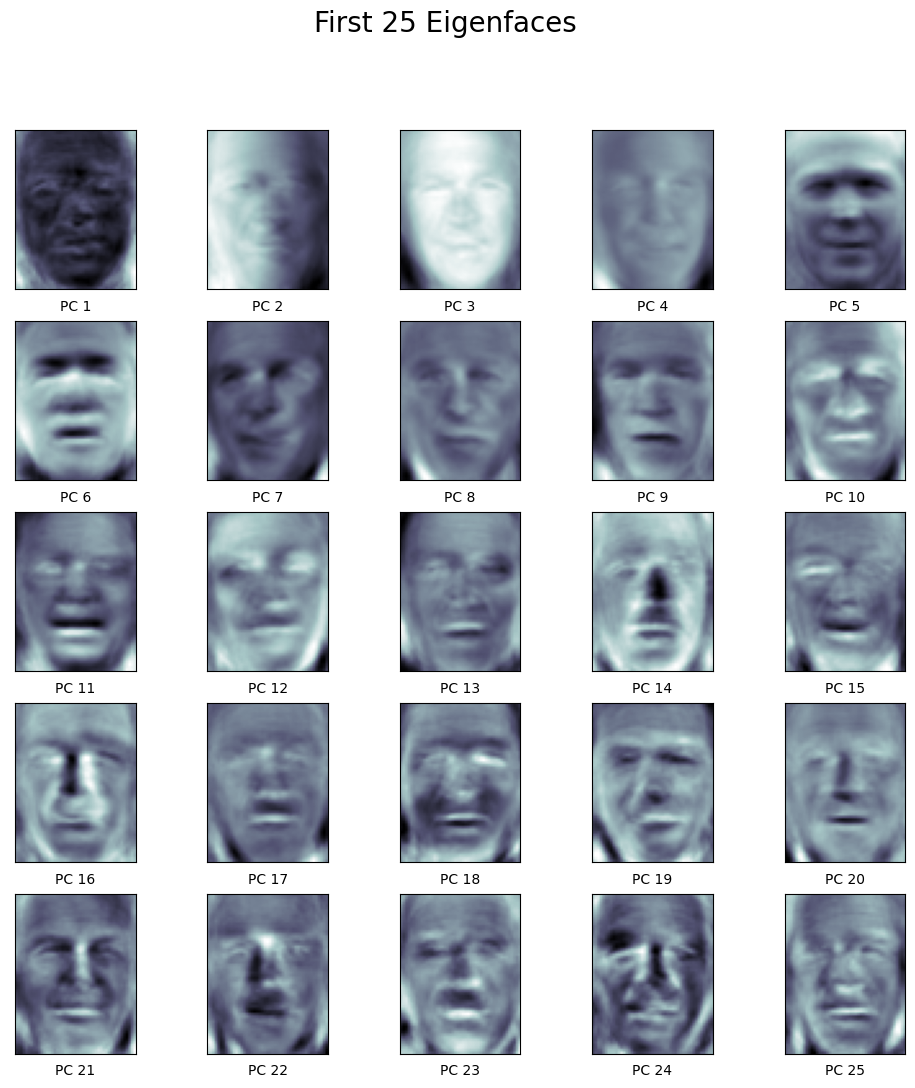

In [80]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(12,12))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')
    ax.set(xticks=[], yticks=[])
    ax.set_xlabel(f"PC {i+1}")
plt.suptitle("First 25 Eigenfaces", fontsize=20)
plt.show()

## Explained variance ratio for each principal component

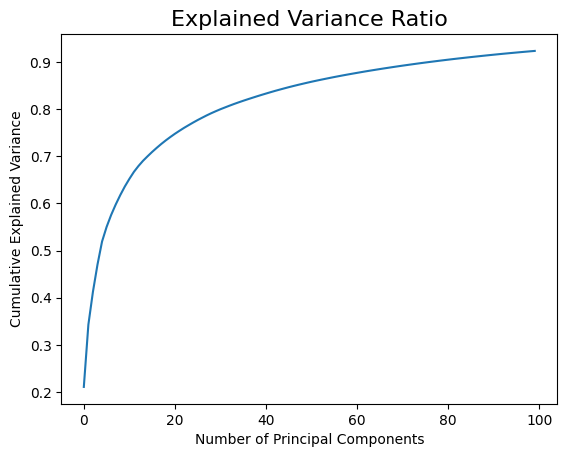

In [81]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title("Explained Variance Ratio", fontsize=16)
plt.show()

## Example faces from the test set along with their predicted labels and the true labels

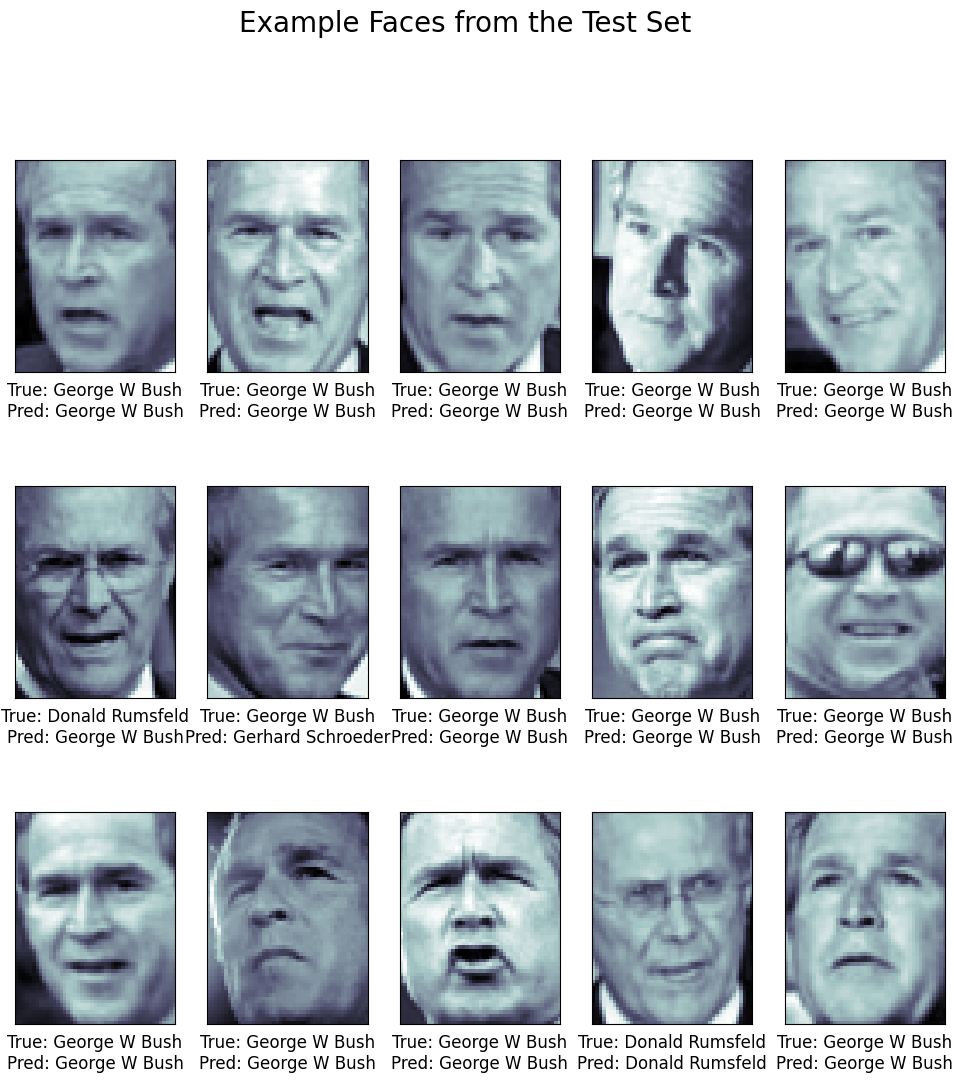

In [82]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(12,12))
for i, ax in enumerate(axes.flat):
    idx = random.randint(0, len(X_test)-1)
    img = X_test[idx].reshape(62, 47)
    ax.imshow(img, cmap='bone')
    ax.set(xticks=[], yticks=[])
    true_label = lfw_dataset.target_names[y_test[idx]]
    pred_label = lfw_dataset.target_names[y_pred[idx]]
    ax.set_xlabel(f"True: {true_label}\nPred: {pred_label}", fontsize=12)
plt.suptitle("Example Faces from the Test Set", fontsize=20)
plt.show()


## Scree Plot

/home/spidey/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


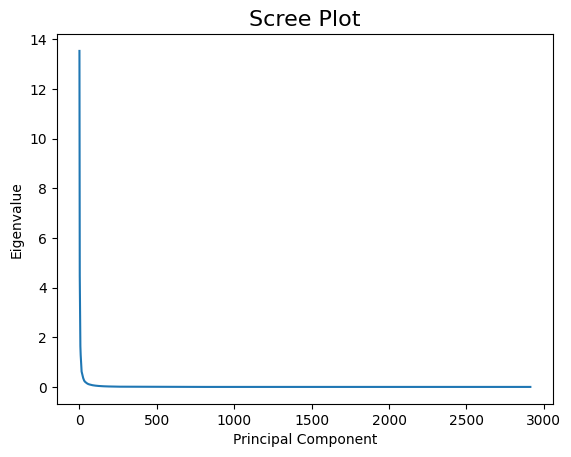

In [83]:
# Calculate the eigenvalues of the covariance matrix
cov_matrix = np.cov(X_train.T)
eigenvalues, _ = np.linalg.eig(cov_matrix)

# Sort the eigenvalues in decreasing order
sorted_eigenvalues = np.sort(eigenvalues)[::-1]

# Plot the scree plot
plt.plot(sorted_eigenvalues)
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title("Scree Plot", fontsize=16)
plt.show()


## Cumulative explained variance ratio

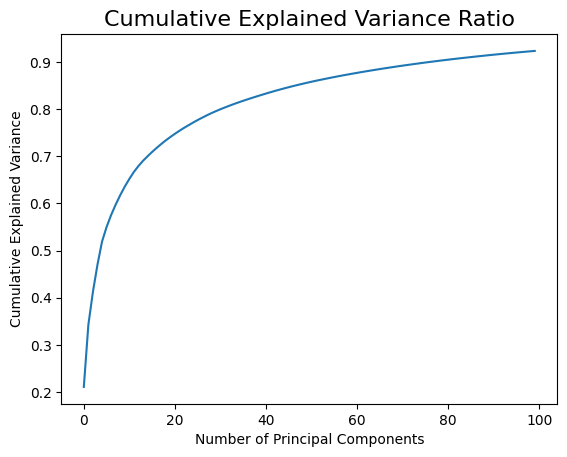

In [84]:
# Calculate the explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
plt.plot(cumulative_variance_ratio)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title("Cumulative Explained Variance Ratio", fontsize=16)
plt.show()

## Classification accuracy as a function of the number of principal components

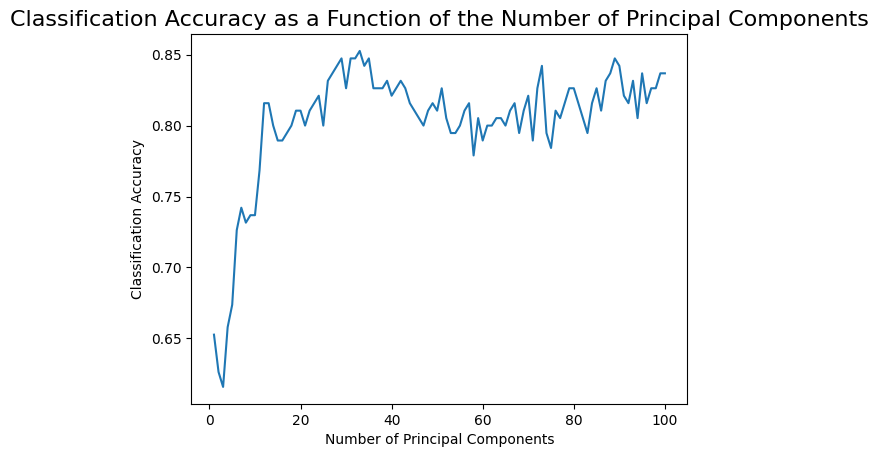

In [85]:
# Evaluate the performance of the classifier on the test set as a function of the number of principal components
accuracies = []
num_components_list = range(1, n_components+1)
for num_components in num_components_list:
    pca = PCA(n_components=num_components, whiten=True)
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train_pca, y_train)
    y_pred = knn_classifier.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot the classification accuracy as a function of the number of principal components
plt.plot(num_components_list, accuracies)
plt.xlabel('Number of Principal Components')
plt.ylabel('Classification Accuracy')
plt.title("Classification Accuracy as a Function of the Number of Principal Components", fontsize=16)
plt.show()

## Plotting the Reconstructed images using the first few principal components

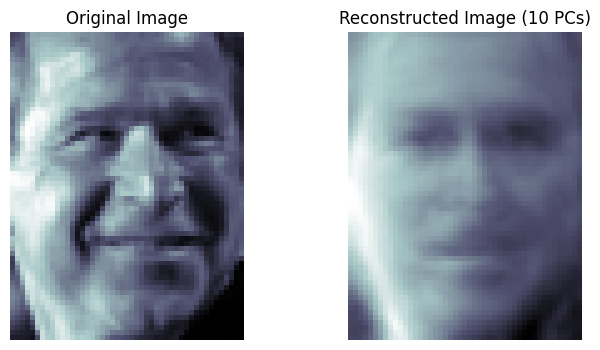

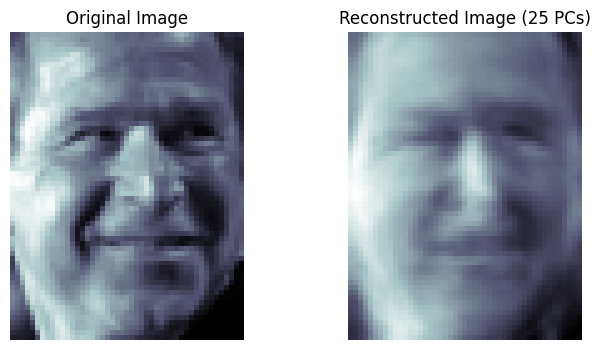

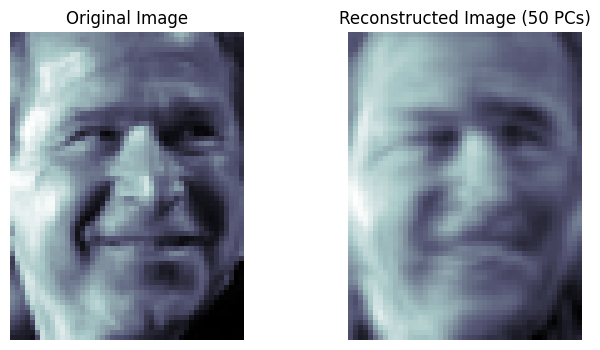

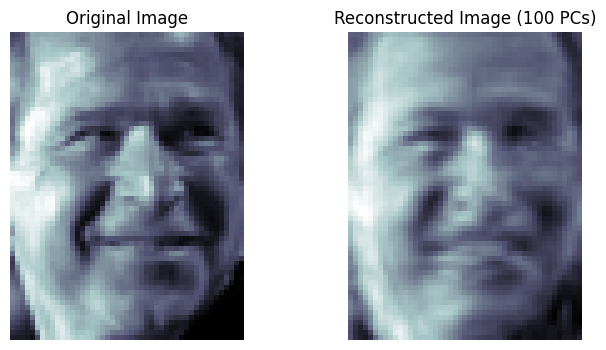

In [86]:
# Choose a random image from the test set
idx = np.random.randint(0, len(X_test))
img = X_test[idx]

# Project the image onto the first few principal components
for num_components in [10, 25, 50, 100]:
    pca = PCA(n_components=num_components)
    pca.fit(X_train)
    X_test_pca = pca.transform(X_test)
    img_pca = pca.transform([img])

    # Reconstruct the image using the first few principal components
    img_reconstructed = pca.inverse_transform(img_pca)

    # Plot the original image and the reconstructed image
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    axes[0].imshow(img.reshape(62, 47), cmap='bone')
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    axes[1].imshow(img_reconstructed.reshape(62, 47), cmap='bone')
    axes[1].set_title(f'Reconstructed Image ({num_components} PCs)')
    axes[1].axis('off')
    plt.show()

## Face clustering based on the principal components

/home/spidey/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


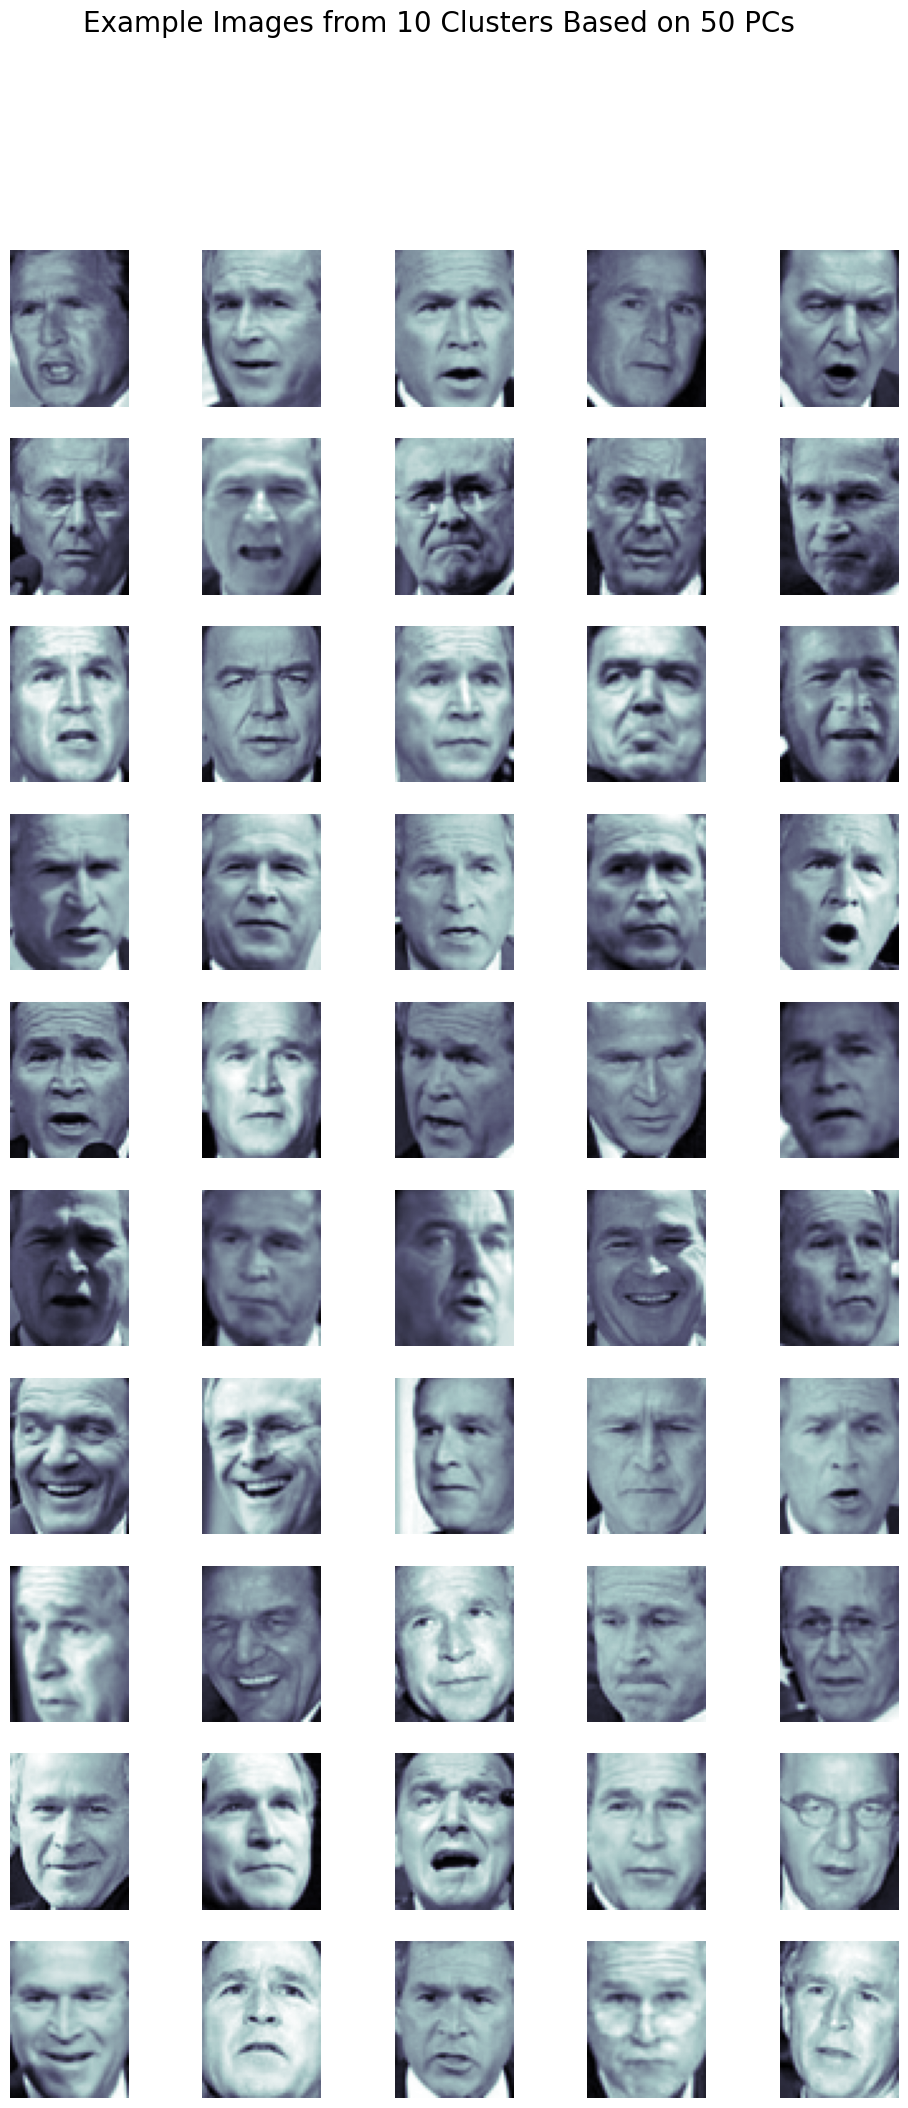

In [87]:
# Project the images onto the first few principal components
num_components = 50
pca = PCA(n_components=num_components)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# Cluster the faces based on the principal components
k = 10
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X_train_pca)
y_pred_train = kmeans.predict(X_train_pca)
y_pred_test = kmeans.predict(X_test_pca)

# Plot a few examples of the clusters
fig, axes = plt.subplots(nrows=k, ncols=5, figsize=(12,24))
for i in range(k):
    indices = np.where(y_pred_train == i)[0]
    for j in range(5):
        idx = indices[np.random.randint(0, len(indices))]
        img = X_train[idx].reshape(62, 47)
        axes[i, j].imshow(img, cmap='bone')
        axes[i, j].axis('off')
plt.suptitle(f"Example Images from {k} Clusters Based on {num_components} PCs", fontsize=20)
plt.show()

## Visualize the principal components in 3D using t-SNE

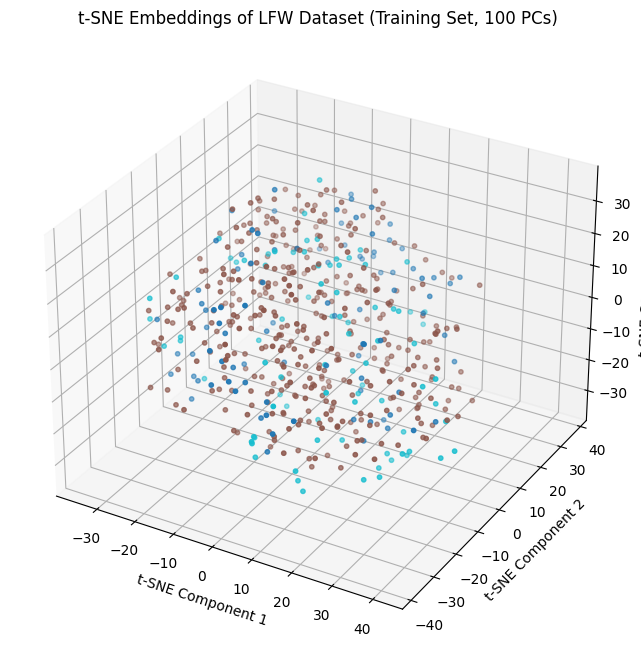

In [88]:
# Project the images onto the first few principal components
num_components = 100
pca = PCA(n_components=num_components)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# Visualize the principal components in 3D using t-SNE
tsne = TSNE(n_components=3, perplexity=30, random_state=0)
X_train_tsne = tsne.fit_transform(X_train_pca)
X_test_tsne = tsne.fit_transform(X_test_pca)

# Create a 3D scatter plot of the t-SNE embeddings
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], X_train_tsne[:, 2], c=y_train, cmap='tab10', s=10)
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')
ax.set_title(f"t-SNE Embeddings of LFW Dataset (Training Set, {num_components} PCs)")
plt.show()

# Applications

# Application 1: Outlier detection using PCA

In [89]:
# Load the LFW dataset
lfw_dataset = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
X = lfw_dataset.data
y = lfw_dataset.target
target_names = lfw_dataset.target_names

# Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Apply PCA to the standardized data
pca = PCA(n_components=100)
X_pca = pca.fit_transform(X_std)

# Identify and remove outliers using the Mahalanobis distance
cov = EllipticEnvelope(random_state=0).fit(X_pca)
outliers = cov.predict(X_pca) == -1
X_no_outliers = X[~outliers]
y_no_outliers = y[~outliers]
print(f"Number of outliers: {np.sum(outliers)}")


Number of outliers: 76


# Application 2: Feature Selection

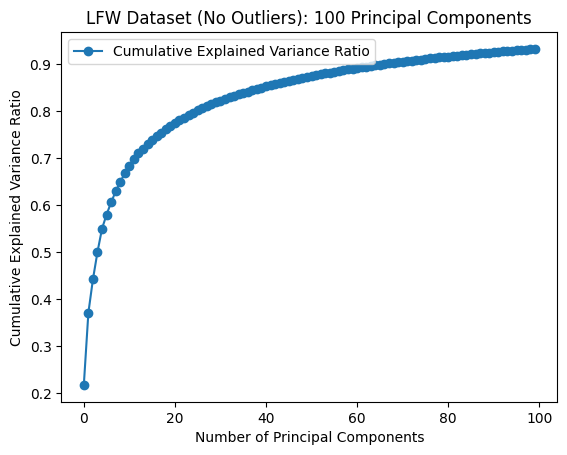

In [90]:
# Select the top N principal components and plot the explained variance ratio
n_components = 100
pca = PCA(n_components=n_components)
pca.fit(X_no_outliers)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)
plt.plot(cumulative_explained_variance_ratio, 'o-', label='Cumulative Explained Variance Ratio')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title(f"LFW Dataset (No Outliers): {n_components} Principal Components")
plt.legend()
plt.show()


# Application 3: Data Compression

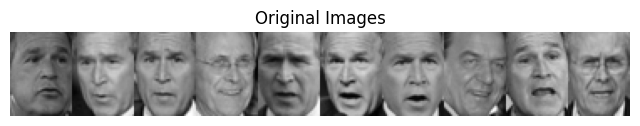

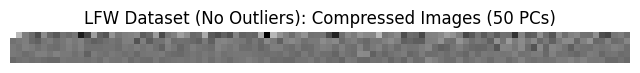

In [91]:
# Project the data onto the top N principal components and visualize the compressed data
n_components = 50
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_no_outliers)
plt.figure(figsize=(8, 8))
plt.imshow(np.hstack(X_no_outliers[0:10, :].reshape(-1, 50, 37)),
           cmap='gray')
plt.title('Original Images')
plt.axis('off')
plt.show()

plt.figure(figsize=(8, 8))
plt.imshow(np.hstack(X_pca[0:10, :].reshape(-1, 5, 10)),
           cmap='gray')
plt.title(f'LFW Dataset (No Outliers): Compressed Images ({n_components} PCs)')
plt.axis('off')
plt.show()


# Application 4: Clustering with PCA

/home/spidey/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


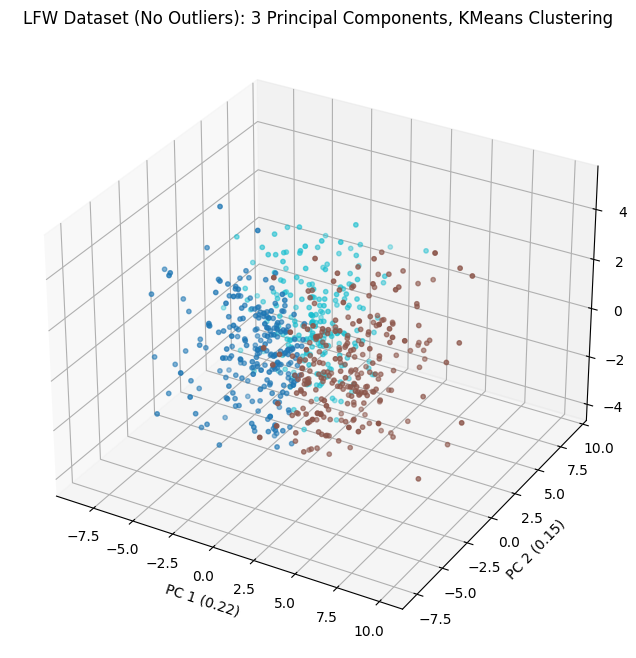

In [92]:

# Use k-means clustering on the top N principal components and visualize the clusters
n_components = 3
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_no_outliers)
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_pca)
y_pred = kmeans.predict(X_pca)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y_pred, cmap='tab10', s=10)
ax.set_xlabel(f'PC 1 ({explained_variance_ratio[0]:.2f})')
ax.set_ylabel(f'PC 2 ({explained_variance_ratio[1]:.2f})')
ax.set_zlabel(f'PC 3 ({explained_variance_ratio[2]:.2f})')
ax.set_title(f"LFW Dataset (No Outliers): {n_components} Principal Components, KMeans Clustering")
plt.show()


## Application 5: Dimensionality Reduction and Visualization

/tmp/ipykernel_6599/2542776505.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_tsne[y_no_outliers == i, 0], X_tsne[y_no_outliers == i, 1],


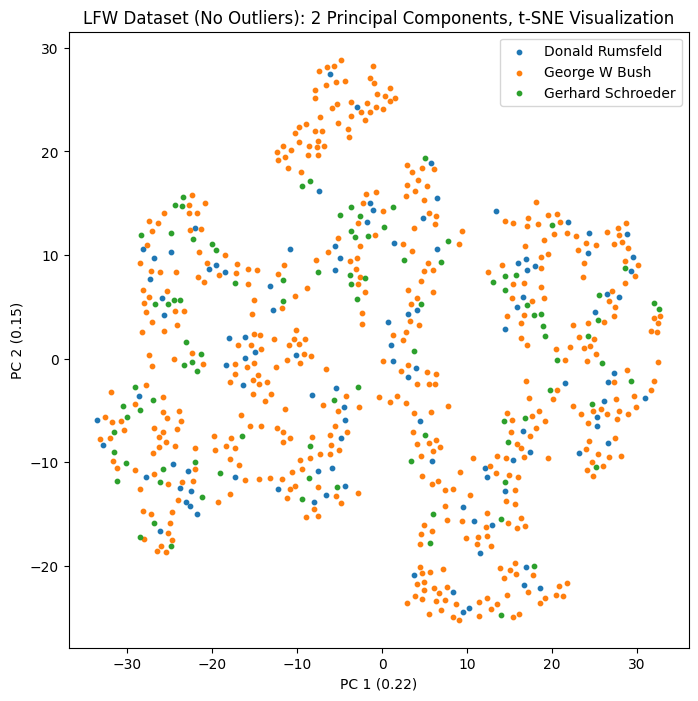

In [93]:

# Project the data onto the top 2 principal components and visualize using t-SNE
n_components = 2
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_no_outliers)
tsne = TSNE(n_components=n_components, random_state=0)
X_tsne = tsne.fit_transform(X_pca)

plt.figure(figsize=(8, 8))
for i, target_name in enumerate(target_names):
    plt.scatter(X_tsne[y_no_outliers == i, 0], X_tsne[y_no_outliers == i, 1],
                label=target_name, cmap='tab10', s=10)
plt.xlabel(f'PC 1 ({explained_variance_ratio[0]:.2f})')
plt.ylabel(f'PC 2 ({explained_variance_ratio[1]:.2f})')
plt.title(f"LFW Dataset (No Outliers): {n_components} Principal Components, t-SNE Visualization")
plt.legend()
plt.show()



## Real life Application: Gender Recognition using PCA and SVC

In [94]:
# Load the LFW dataset
lfw_dataset = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# Extract the images and target labels
X = lfw_dataset.data
y = lfw_dataset.target
target_names = lfw_dataset.target_names

# Fit a PCA model to the dataset
n_components = 100
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True)
pca.fit(X)

# Project the data onto the top principal components
X_pca = pca.transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.25, random_state=42)

# Train a Support Vector Machine (SVM) classifier on the training data
svm = make_pipeline(PCA(n_components=n_components, svd_solver='randomized', whiten=True), SVC(kernel='rbf', class_weight='balanced'))
svm.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svm.predict(X_test)

# Print the classification report and confusion matrix
print(classification_report(y_test, y_pred, target_names=target_names))
print('confusion_matrix:')
print(confusion_matrix(y_test, y_pred))


                   precision    recall  f1-score   support

  Donald Rumsfeld       1.00      0.69      0.82        36
    George W Bush       0.83      1.00      0.91       123
Gerhard Schroeder       1.00      0.55      0.71        31

         accuracy                           0.87       190
        macro avg       0.94      0.75      0.81       190
     weighted avg       0.89      0.87      0.86       190

confusion_matrix:
[[ 25  11   0]
 [  0 123   0]
 [  0  14  17]]
